<a href="https://colab.research.google.com/github/NikolSkvarilova/Machine-Learning-Basics/blob/main/Feature_crosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [3]:
feature_columns = []

latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)
                  
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

fp_feature_layer = layers.DenseFeatures(feature_columns)

In [4]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
170/170 [==============================] - 2s 3ms/step - loss: 14696.6055 - root_mean_squared_error: 121.2296
Epoch 2/30
170/170 [==============================] - 1s 4ms/step - loss: 13477.4639 - root_mean_squared_error: 116.0925
Epoch 3/30
170/170 [==============================] - 1s 3ms/step - loss: 13431.3115 - root_mean_squared_error: 115.8935
Epoch 4/30
170/170 [==============================] - 1s 4ms/step - loss: 13391.9922 - root_mean_squared_error: 115.7238
Epoch 5/30
170/170 [==============================] - 1s 4ms/step - loss: 13337.8359 - root_mean_squared_error: 115.4895
Epoch 6/30
170/170 [==============================] - 1s 4ms/step - loss: 13304.6143 - root_mean_squared_error: 115.3456
Epoch 7/30
170/170 [==============================] - 1s 3ms/step - loss: 13273.9346 - root_mean_squared_error: 115.2126
Epoch 8/30
170/170 [==============================] - 1s 4ms/step - loss: 13234.4824 - root_mean_squared_error: 115.0412
Epoch 9/30
170/170 [============

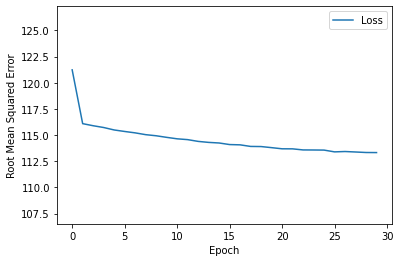


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 4ms/step - loss: 12277.5039 - root_mean_squared_error: 110.8039


[12277.50390625, 110.80390167236328]

In [5]:
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [6]:
# using floating point values for longitude and latitude is not a good idea 

In [7]:
resolution_in_degrees = 1.0

feature_columns = []

latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df["latitude"])), 
                                int(max(train_df["latitude"])), 
                                resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column,
                                               latitude_boundaries)
feature_columns.append(latitude)

longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df["longitude"])), 
                                int(max(train_df["longitude"])), 
                                resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column,
                                              longitude_boundaries)
feature_columns.append(longitude)
buckets_feature_layer = layers.DenseFeatures(feature_columns)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/35
170/170 [==============================] - 1s 2ms/step - loss: 52085.5859 - root_mean_squared_error: 228.2227
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 44714.8281 - root_mean_squared_error: 211.4588
Epoch 3/35
170/170 [==============================] - 0s 2ms/step - loss: 38117.7969 - root_mean_squared_error: 195.2378
Epoch 4/35
170/170 [==============================] - 0s 2ms/step - loss: 32306.4629 - root_mean_squared_error: 179.7400
Epoch 5/35
170/170 [==============================] - 0s 2ms/step - loss: 27268.3477 - root_mean_squared_error: 165.1313
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 23014.0391 - root_mean_squared_error: 151.7038
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 19507.4004 - root_mean_squared_error: 139.6689
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 16697.8125 - root_mean_squared_error: 129.2200
Epoch 9/35
170/170 [============

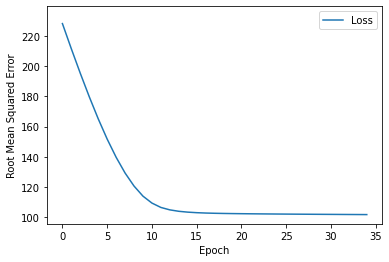


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 10199.1670 - root_mean_squared_error: 100.9909


[10199.1669921875, 100.99092864990234]

In [8]:
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [9]:
# we can take it a step further
# do a feature cross of longitude and latitude
resolution_in_degrees = 0.1
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], 
                                                        hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)                              

feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


170/170 [==============================] - 1s 2ms/step - loss: 53857.4570 - root_mean_squared_error: 232.0721
Epoch 2/35
170/170 [==============================] - 0s 2ms/step - loss: 49352.9453 - root_mean_squared_error: 222.1552
Epoch 3/35
170/170 [==============================] - 0s 2ms/step - loss: 45125.1562 - root_mean_squared_error: 212.4268
Epoch 4/35
170/170 [==============================] - 0s 2ms/step - loss: 41183.0312 - root_mean_squared_error: 202.9360
Epoch 5/35
170/170 [==============================] - 0s 2ms/step - loss: 37496.2188 - root_mean_squared_error: 193.6394
Epoch 6/35
170/170 [==============================] - 0s 2ms/step - loss: 34080.6172 - root_mean_squared_error: 184.6094
Epoch 7/35
170/170 [==============================] - 0s 2ms/step - loss: 30951.3398 - root_mean_squared_error: 175.9299
Epoch 8/35
170/170 [==============================] - 0s 2ms/step - loss: 28080.3691 - root_mean_squared_error: 167.5720
Epoch 9/35
170/170 [=======================

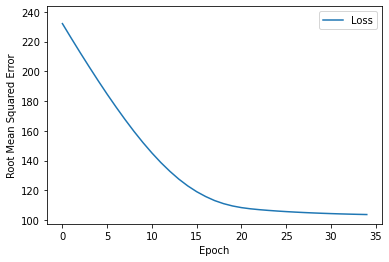


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 2ms/step - loss: 10520.7695 - root_mean_squared_error: 102.5708


[10520.76953125, 102.57080078125]

In [10]:
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)